<span style="font-size:30px">**Problemas de Regresión, Parte 1: Regresión Lineal Simple.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Introducción:

### Recordando que en el aprendizaje supervisado tenemos el dataset expresado en un conjunto de pares $\{ (\vec{x_i}, y_i) | i=1, \dots , n\}$, en donde el conjunto $\{ \vec{x_i} \in \mathbb{R}^d\}$ se refiere a los vectores de características, los ejemplares de entrada, mientras que  el conjunto $\{ y_i \in \mathbb{R}\}$ se refiere a las predicciones, los ejemplares de salida.

### Nótese la notación utilizada:

### $\blacksquare$ En esta parte del aprendizaje supervisado trabajamos un mapeo de un conjunto de entradas a uno de salidas: $X \rightarrow Y$

### $\blacksquare$ $n$ es el número de pares $(\vec{x}, y)$ en el conjunto de entrenamiento.

### $\blacksquare$ $\vec{x_i}$ es la $i$-esima entrada.

### $\blacksquare$ ${y_i}$ es la $i$-esima salida.

### $\blacksquare$ $d$ es la dimensión del espacio de entradas, $\mathbb{R}^d$

### Cuando hablamos de regresión lineal planteamos una hipótesis lineal, de la forma:

<font size="5">  $h_{\vec{\theta}}(\vec{x})=\theta _0 + \theta _1 x_1 + \theta _2 x_2 + \dots +  \theta _d x_d $ </font>

### En donde $\vec{\theta} \in \mathbb{R}^{d+1}$ es el parámetro de la hipótesis, con componentes $\{\theta _p | p=0,1,...,d\} $, y $\{x_k | k=1,2,...,d\}$ son las componentes de $\vec{x}$.

### En la regresión lineal queremos un conjunto de parámetros $\vec{\theta}$ tal que, lo más cercano posible, lleguemos a $h_{\vec{\theta}}(\vec{x}) \approx y$.

### Por convención podemos trabajar agregando una entrada $x_0$, un término de intercepción $\forall \vec{x}$ tal que $\vec{x} \in \mathbb{R}^{d+1}$. De esta forma podemos escribir:

<font size="5">  $h_{\vec{\theta}}(\vec{x})= \sum _{m=0}^{d} \theta _m x_m:= \vec{\theta}^T \vec{x}$ </font>

### En donde $\vec{\theta}^T$ denota el vector $\vec{\theta}$ transpuesto, por lo que $\vec{\theta}^T \vec{x}$ es el producto punto entre los dos vectores implicados.

### Para cuantificar qué tanto nos gusta una hipótesis definimos la función costo, la cual proporciona una medida sobre qué tanto una específica $h_{\vec{\theta}}(\vec{x_i})$ se acerca al valor (verdadero) de su correspondiente $y_i$:

<font size="5">  $J(\vec{\theta}) := \frac{1}{2} \sum _{i=1}^{n} [h_{\vec{\theta}}(\vec{x_i}) -y_i]^2$ </font>

### Lo que sigue a continuación es encontrar un parámetro $\vec{\theta}=\underset{\sim}{\vec{\theta}}$ tal que minimice la función $J(\vec{\theta})$:

<font size="5">  $\underset{\sim}{\vec{\theta}}=ArgMin_{\vec{\theta}} \{J(\vec{\theta})\}$ </font>

### Para lograr el objetivo anterior requerimos de un método o algoritmo, comunmente se usa el método de mínimos cuadrados o el algoritmo iterativo de gradiente de descenso. O incluso cuando trabajamos con datos de entrenamiento muy grandes se llega a trabajar con el gradiente de descenso estocástico.

### Tanto el método por mínimos cuadrados como el gradiente de descenso llegan a la siguiente expresión para la estimación de $\hat{\theta}:$

<font size="5">  $\underset{\sim}{\vec{\theta}}=(X^T X)^{-1} X^T \vec{y}$ </font>

### En donde $X$ es la matriz que concatena verticalmente los vectores $\{\vec{x_1},...,\vec{x_n}\}$ y $\vec{y}$ es el vector de salidas, es decir:

<font size="5">  $X=\begin{bmatrix}
\vec{x_1} \\
\vec{x_2} \\
\vdots \\
\vec{x_n}
\end{bmatrix}$, $\vec{y}=\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}$ </font>

# Ejercicio:

### En esta primera parte de regresión lineal vamos a abordar un caso de regresión lineal simple, la cual se refiere a una situación particular cuando no tenemos un conjunto de entradas descritas por $\{ \vec{x_i} \in \mathbb{R}^{d+1}\}$, sino que están descritas por $\{ x_i \in \mathbb{R}\}$. Es decir, vamos a trabajar con los pares $\{ ({x_i}, y_i) | i=1, \dots , n\}$

### En este caso la matriz $X$ es un vector columna, por lo que desde una perspectiva vectorial tenemos los datos:

<font size="5">  $ \vec{x}= \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix} $, $\vec{y}=\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}$ </font>

### Trabajaremos con el conjunto de datos del archivo *salarios.csv*. Para la regresión lineal simple utilizaremos la función LinearRegression() de Scikit-learn, la cual minimiza la función costo por el método de mínimos cuadrados.

# Preparando los datos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(f"Preprocesado de datos: \n")
print( "\n")

#Importar el dataset:
dataset=pd.read_csv('salarios.csv')
print(f"El dataset es: \n")
display(dataset)
print( "\n")
x=dataset.iloc[:, :-1].values #Definimos la matriz representada mediante un vector columna de un conjunto de entradas {x_i}
y=dataset.iloc[:, -1].values #Definimos el vector de salidas con componentes {y_i}
print(f"El vector de entradas es: \n")
display(x)
print( "\n")
print(f"El vector de salidas es: \n")
display(y)
print( "\n")

#División del data set (train y test):
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
print(f"Los conjuntos de entrenamiento son: \n x~{x_train} \n y~{y_train}")
print( "\n")
print(f"Los conjuntos de prueba son: \n x~{x_test} \n y~{y_test}")
print( "\n")

Preprocesado de datos: 



El dataset es: 



,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0




El vector de entradas es: 



array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])



El vector de salidas es: 



array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])



Los conjuntos de entrenamiento son: 
 x~[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] 
 y~[ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


Los conjuntos de prueba son: 
 x~[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]] 
 y~[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]




# Regresión lineal simple para el conjunto de entrenamiento y las predicciones:

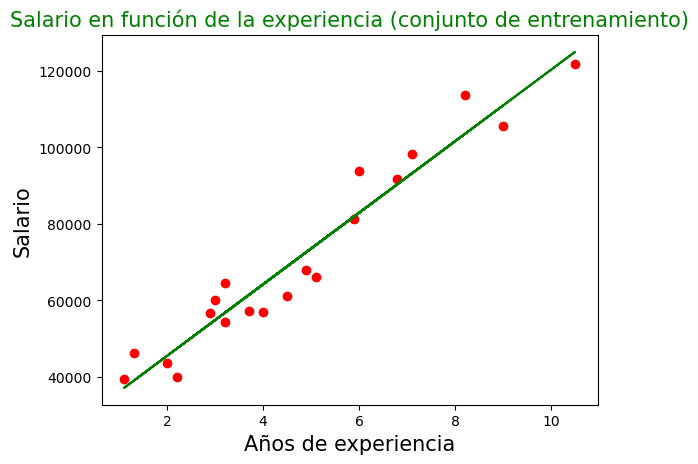

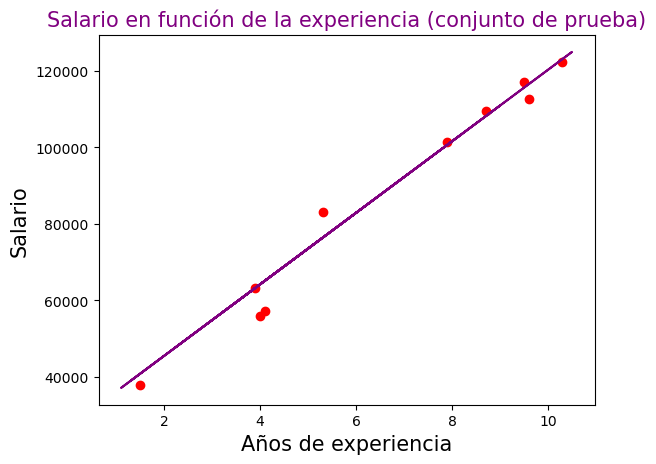

In [8]:
#Modelo de regresión lineal simple:
regresión=LinearRegression()

#Ajuste del modelo a los datos de entrenamiento (entrenamos el modelo de regresión lineal simple en el conjunto de entrenamiento): 
regresión.fit(x_train, y_train)

#Predicción con el ajuste (salidas):
yi=regresión.predict(x_test)

#Visualizando los resultados para el conjunto de entrenamiento:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regresión.predict(x_train), color = 'g')
plt.title('Salario en función de la experiencia (conjunto de entrenamiento)',fontsize=15,color = 'g')
plt.xlabel('Años de experiencia',fontsize=15)
plt.ylabel('Salario',fontsize=15)
plt.show()

#Visualizando los resultados para el conjunto de prueba:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regresión.predict(x_train), color = 'purple')
plt.title('Salario en función de la experiencia (conjunto de prueba)',fontsize=15,color = 'purple')
plt.xlabel('Años de experiencia',fontsize=15)
plt.ylabel('Salario',fontsize=15)
plt.show()


# Fin del ejercicio.